<a href="https://colab.research.google.com/github/TadieB/pytorch-collab/blob/main/DeepCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
import os
import torch
import torchvision
import tarfile

from torchvision.datasets.utils import download_url
from torch.utils.data import random_split

# Downloading the Dataset from url

+ png format images from fast.ai page

In [10]:
# download dataset
dataset_url = 'https://files.fast.ai/data/examples/cifar10.tgz'
download_url(dataset_url,'cifa10')

100%|██████████| 168168549/168168549 [00:01<00:00, 115917028.45it/s]


+ The extracted dataset is saved to the directory data/cifar10
+ cifar10 contains two folders: train, test
+ Each of them contains 10 foldes, one for each class of images.

# Extracting the .tgz Dataset

In [11]:
# Extract from archive
with tarfile.open('./cifa10/cifar10.tgz','r:gz') as tar:
  tar.extractall(path='./data')

# Exploring the Dataset & Directory

In [13]:
data_dir = './data/cifar10'
print(os.listdir(data_dir))
classes = os.listdir(data_dir + '/train')
print(classes)

['test', 'labels.txt', 'train']
['truck', 'cat', 'automobile', 'horse', 'ship', 'dog', 'deer', 'bird', 'frog', 'airplane']


In [14]:
airplane_files = os.listdir(data_dir + "/train/airplane")
print("No. of training examples for airplanes:", len(airplane_files))
print(airplane_files[:5])

No. of training examples for airplanes: 5000
['17115_airplane.png', '16965_airplane.png', '25330_airplane.png', '25746_airplane.png', '25616_airplane.png']


In [15]:
ship_test_files = os.listdir(data_dir + "/test/ship")
print("No. of training examples for ship:", len(ship_test_files))
print(ship_test_files[:5])

No. of training examples for ship: 1000
['1075_ship.png', '6684_ship.png', '1471_ship.png', '404_ship.png', '1205_ship.png']


+ the above folder /directory/ structure (one for each class) is common in computer vision
+ DL libraries povide utilities for working with such datasets.
+ use ImageFolder class from torchvision to load the data as pytorch tensors.

# Visualize the Training Set

In [16]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [17]:
dataset = ImageFolder(data_dir + '/train', transform = ToTensor())

In [26]:
dataset[0]

(tensor([[[0.8588, 0.8588, 0.8627,  ..., 0.8510, 0.8471, 0.8392],
          [0.8667, 0.8667, 0.8745,  ..., 0.8588, 0.8549, 0.8471],
          [0.8667, 0.8667, 0.8745,  ..., 0.8588, 0.8549, 0.8471],
          ...,
          [0.8980, 0.9020, 0.9098,  ..., 0.8980, 0.8902, 0.8863],
          [0.8471, 0.8549, 0.8706,  ..., 0.8980, 0.8902, 0.8824],
          [0.7608, 0.7490, 0.7725,  ..., 0.8980, 0.8902, 0.8824]],
 
         [[0.9333, 0.9333, 0.9373,  ..., 0.9176, 0.9137, 0.9059],
          [0.9412, 0.9412, 0.9490,  ..., 0.9294, 0.9216, 0.9137],
          [0.9412, 0.9412, 0.9490,  ..., 0.9255, 0.9216, 0.9137],
          ...,
          [0.9608, 0.9569, 0.9569,  ..., 0.9412, 0.9412, 0.9412],
          [0.9020, 0.9098, 0.9255,  ..., 0.9412, 0.9412, 0.9373],
          [0.8157, 0.8039, 0.8275,  ..., 0.9412, 0.9412, 0.9373]],
 
         [[0.9608, 0.9608, 0.9647,  ..., 0.9490, 0.9412, 0.9412],
          [0.9686, 0.9686, 0.9765,  ..., 0.9608, 0.9529, 0.9490],
          [0.9686, 0.9686, 0.9765,  ...,

In [18]:
data_dir

'./data/cifar10'

+ each element from the training set is a tuple containing an image tensor and a label
(imagetensor, label)

In [19]:
img, label = dataset[0]
print(img.shape, label)
img

torch.Size([3, 32, 32]) 0


tensor([[[0.8588, 0.8588, 0.8627,  ..., 0.8510, 0.8471, 0.8392],
         [0.8667, 0.8667, 0.8745,  ..., 0.8588, 0.8549, 0.8471],
         [0.8667, 0.8667, 0.8745,  ..., 0.8588, 0.8549, 0.8471],
         ...,
         [0.8980, 0.9020, 0.9098,  ..., 0.8980, 0.8902, 0.8863],
         [0.8471, 0.8549, 0.8706,  ..., 0.8980, 0.8902, 0.8824],
         [0.7608, 0.7490, 0.7725,  ..., 0.8980, 0.8902, 0.8824]],

        [[0.9333, 0.9333, 0.9373,  ..., 0.9176, 0.9137, 0.9059],
         [0.9412, 0.9412, 0.9490,  ..., 0.9294, 0.9216, 0.9137],
         [0.9412, 0.9412, 0.9490,  ..., 0.9255, 0.9216, 0.9137],
         ...,
         [0.9608, 0.9569, 0.9569,  ..., 0.9412, 0.9412, 0.9412],
         [0.9020, 0.9098, 0.9255,  ..., 0.9412, 0.9412, 0.9373],
         [0.8157, 0.8039, 0.8275,  ..., 0.9412, 0.9412, 0.9373]],

        [[0.9608, 0.9608, 0.9647,  ..., 0.9490, 0.9412, 0.9412],
         [0.9686, 0.9686, 0.9765,  ..., 0.9608, 0.9529, 0.9490],
         [0.9686, 0.9686, 0.9765,  ..., 0.9569, 0.9529, 0.

In [20]:
print(dataset.classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [22]:
f = open("./data/cifar10/labels.txt", "r")
print(f.read())

airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck



+ Changing the Tenso Dimensions to (32,32,3)

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
def show_example(img, label):
  print('Label: ', dataset.classes[label],"("+str(label)+")")
  plt.imshow(img.permute(1,2,0))

+ The permute(1, 2, 0) operation swaps the dimensions in such a way that the tensor is rearranged to (H, W, C).

+ C = no. of channels , H = height, W = weight

Label:  airplane (0)


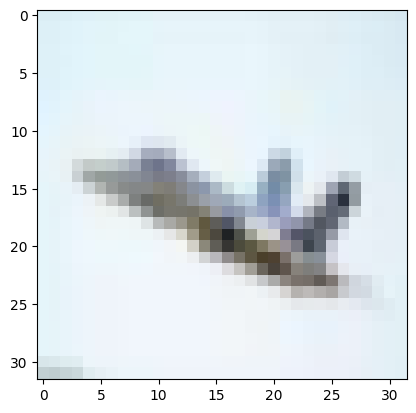

In [36]:
img, label = dataset[0]
show_example(img, label)

Label:  bird (2)


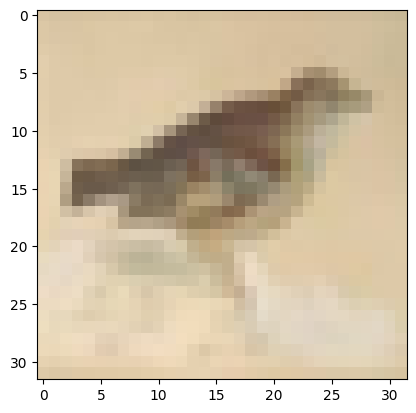

In [38]:
show_example(*dataset[10099])

# Training and Validation Datasets

+ Training set - used to train the model i.e. compute the loss and adjust the weights of the model using gradient descent.

+ Validation set - used to evaluate the model while training, adjust hypepaameters (learning rate, reg, etc) and pick the best vesion of the model.

+ Test set - used to compare diffeent models, or different types of modeling approaches, and report the final accuracy of the model.

In [42]:
random_seed = 42
torch.manual_seed(random_seed)
# Using the same seed ensures that random operations,
# like initializing weights or shuffling data,
# will produce the same results each time the code is run.

In [41]:
val_size = 5000
train_size = len(dataset)-val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(45000, 5000)

In [43]:
from torch.utils.data.dataloader import DataLoader

batch_size = 128

In [45]:
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(train_ds, batch_size*2, num_workers=4,pin_memory=True)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


+ Use make_grid to look at batches of images from the dataset.

In [47]:
from torchvision.utils import make_grid

def show_batch(dl):
  for images, labels in dl:
    fig, ax = plt.subplots(figsize=(12,6))
    ax.set_xticks([]);
    ax.set_yticks([]);
    ax.imshow(make_grid(images,nrow=16).permute(1,2,0))
    break

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


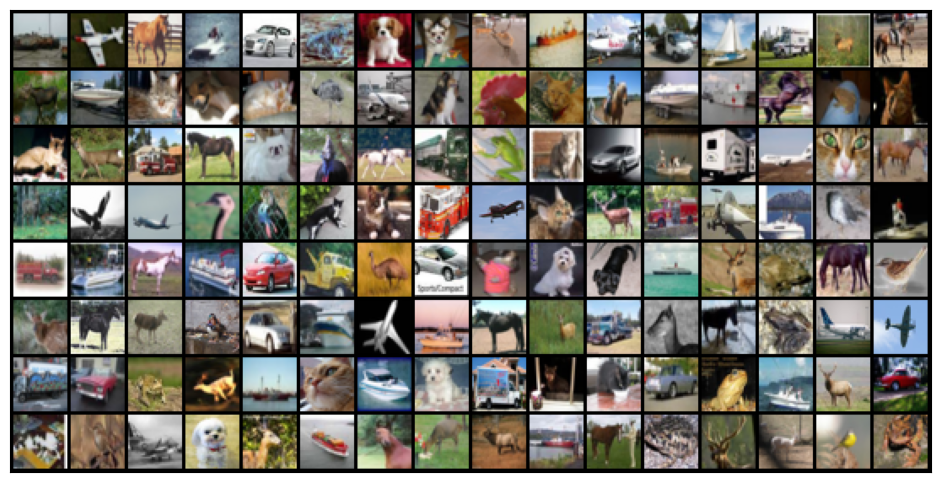

In [48]:
show_batch(train_dl)